# Museum of Modern Art Collection

In [1]:
# https://www.kaggle.com/momanyc/museum-collection

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
artists = pd.read_csv('artists.csv', sep=',')

In [4]:
artworks = pd.read_csv('artworks.csv', sep=',')

In [5]:
# Darbo tikslai: 
# 1) apžvelgti MoMa duomenų rinkinius (pagal meno kūrinių klasifikaciją, departamentus,
# menininkus, genderinį pasiskirstymą, tautybę, sutvarkius ir paruošus duomenis)
# 
# 2) atsakyti į hipotezę: ar galime teigti, jog "FLUXUS" meninis judėjimas užsibaigė?

In [6]:
import sys
sys.path

["C:\\Users\\Lenovo\\PYTHON'21\\VCS'2020",
 'C:\\Users\\Lenovo\\anaconda3\\python38.zip',
 'C:\\Users\\Lenovo\\anaconda3\\DLLs',
 'C:\\Users\\Lenovo\\anaconda3\\lib',
 'C:\\Users\\Lenovo\\anaconda3',
 '',
 'C:\\Users\\Lenovo\\anaconda3\\lib\\site-packages',
 'C:\\Users\\Lenovo\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\Lenovo\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Lenovo\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Lenovo\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Lenovo\\.ipython']

In [7]:
artists.T

,0,1,2,3,4,5,6,7,8,9,...,15081,15082,15083,15084,15085,15086,15087,15088,15089,15090
Artist ID,1,2,3,4,5,6,7,9,10,11,...,67353,67379,67420,67437,67451,67452,67453,67652,67694,67695
Name,Robert Arneson,Doroteo Arnaiz,Bill Arnold,Charles Arnoldi,Per Arnoldi,Danilo Aroldi,Bill Aron,David Aronson,Irene Aronson,Jean (Hans) Arp,...,Michael Mideke,N. Dash,Walter Burley Griffin,Sebastian Black,Xiao Yu,Liu Jianhua,Leng Lin,Ellie Nagler,Glenn Williams,Ely Ramen
Nationality,American,Spanish,American,American,Danish,Italian,American,American,American,French,...,NaN,American,NaN,American,Chinese,Chinese,Chinese,NaN,NaN,NaN
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Female,Male,...,NaN,Female,NaN,Male,Male,Male,Male,NaN,Male,NaN
Birth Year,1930,1936,1941,1946,1941,1925,1941,1923,1918,1886,...,NaN,1980,NaN,1985,1965,1962,1965,NaN,NaN,NaN
Death Year,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
artists.head(10)

,Artist ID,Name,Nationality,Gender,Birth Year,Death Year
0,1,Robert Arneson,American,Male,1930.0,1992.0
1,2,Doroteo Arnaiz,Spanish,Male,1936.0,NaN
2,3,Bill Arnold,American,Male,1941.0,NaN
3,4,Charles Arnoldi,American,Male,1946.0,NaN
4,5,Per Arnoldi,Danish,Male,1941.0,NaN
5,6,Danilo Aroldi,Italian,Male,1925.0,NaN
6,7,Bill Aron,American,Male,1941.0,NaN
7,9,David Aronson,American,Male,1923.0,NaN
8,10,Irene Aronson,American,Female,1918.0,NaN
9,11,Jean (Hans) Arp,French,Male,1886.0,1966.0


In [9]:
artists.describe().T

,count,mean,std,min,25%,50%,75%,max
Artist ID,15091.0,18297.556027,16632.963898,1.0,4195.5,8593.0,33088.5,67695.0
Birth Year,11237.0,1930.852719,34.531997,1730.0,1910.0,1936.0,1956.0,2012.0
Death Year,4579.0,1974.287399,31.153665,1795.0,1958.0,1980.0,1998.0,2017.0


In [10]:
artists.columns

Index(['Artist ID', 'Name', 'Nationality', 'Gender', 'Birth Year',
       'Death Year'],
      dtype='object')

In [11]:
artworks

,Artwork ID,Title,Artist ID,Name,Date,Medium,Dimensions,Acquisition Date,Credit,Catalogue,...,Classification,Object Number,Diameter (cm),Circumference (cm),Height (cm),Length (cm),Width (cm),Depth (cm),Weight (kg),Duration (s)
0,2,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210,Otto Wagner,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",1996-04-09,Fractional and promised gift of Jo Carole and ...,Y,...,Architecture,885.1996,NaN,NaN,48.6000,NaN,168.9000,NaN,NaN,NaN
1,3,"City of Music, National Superior Conservatory ...",7470,Christian de Portzamparc,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",1995-01-17,Gift of the architect in honor of Lily Auchinc...,Y,...,Architecture,1.1995,NaN,NaN,40.6401,NaN,29.8451,NaN,NaN,NaN
2,4,"Villa near Vienna Project, Outside Vienna, Aus...",7605,Emil Hoppe,1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,...,Architecture,1.1997,NaN,NaN,34.3000,NaN,31.8000,NaN,NaN,NaN
3,5,"The Manhattan Transcripts Project, New York, N...",7056,Bernard Tschumi,1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",1995-01-17,Purchase and partial gift of the architect in ...,Y,...,Architecture,2.1995,NaN,NaN,50.8000,NaN,50.8000,NaN,NaN,NaN
4,6,"Villa, project, outside Vienna, Austria, Exter...",7605,Emil Hoppe,1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,...,Architecture,2.1997,NaN,NaN,38.4000,NaN,19.1000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130257,217983,Seul/NY/MAX,4469,Nam June Paik,NaN,VHS,NaN,2008-10-08,The Gilbert and Lila Silverman Fluxus Collecti...,N,...,Media,FC5038,NaN,NaN,0.0000,NaN,0.0000,0.0,NaN,NaN
130258,217984,Fluxus-Manifestatie in en Rond Kunsthandel Monet,NaN,NaN,1962,VHS,NaN,2008-10-08,The Gilbert and Lila Silverman Fluxus Collecti...,N,...,Media,FC5039,NaN,NaN,0.0000,NaN,0.0000,0.0,NaN,NaN
130259,217985,Fluxphone Compositions,67695,Ely Ramen,1969,Cassette,NaN,2008-10-08,The Gilbert and Lila Silverman Fluxus Collecti...,N,...,Media,FC5040,NaN,NaN,0.0000,NaN,0.0000,0.0,NaN,NaN
130260,217986,Unidentified,NaN,NaN,NaN,Cassette,NaN,2008-10-08,The Gilbert and Lila Silverman Fluxus Collecti...,N,...,Media,FC5041,NaN,NaN,0.0000,NaN,0.0000,0.0,NaN,NaN


In [12]:
artworks.T

,0,1,2,3,4,5,6,7,8,9,...,130252,130253,130254,130255,130256,130257,130258,130259,130260,130261
Artwork ID,2,3,4,5,6,7,8,9,10,11,...,217978,217979,217980,217981,217982,217983,217984,217985,217986,218011
Title,"Ferdinandsbrücke Project, Vienna, Austria, Ele...","City of Music, National Superior Conservatory ...","Villa near Vienna Project, Outside Vienna, Aus...","The Manhattan Transcripts Project, New York, N...","Villa, project, outside Vienna, Austria, Exter...","The Manhattan Transcripts Project, New York, N...","The Manhattan Transcripts Project, New York, N...","The Manhattan Transcripts Project, New York, N...","The Manhattan Transcripts Project, New York, N...","The Manhattan Transcripts Project, New York, N...",...,The Moon is Rising,Bells,"Requiem for Wagner The Criminal Mayor - ""Eggs""...",Fluxus Festival,Study No. 3,Seul/NY/MAX,Fluxus-Manifestatie in en Rond Kunsthandel Monet,Fluxphone Compositions,Unidentified,Portrait of Takako Saito
Artist ID,6210,7470,7605,7056,7605,7056,7056,7056,7056,7056,...,2637,2637,2637,NaN,4469,4469,NaN,67695,NaN,21398
Name,Otto Wagner,Christian de Portzamparc,Emil Hoppe,Bernard Tschumi,Emil Hoppe,Bernard Tschumi,Bernard Tschumi,Bernard Tschumi,Bernard Tschumi,Bernard Tschumi,...,Dick Higgins,Dick Higgins,Dick Higgins,NaN,Nam June Paik,Nam June Paik,NaN,Ely Ramen,NaN,George Maciunas
Date,1896,1987,1903,1980,1903,1976-77,1976-77,1976-77,1976-77,1976-77,...,NaN,NaN,NaN,1962,NaN,NaN,1962,1969,NaN,NaN
Medium,Ink and cut-and-pasted painted pages on paper,Paint and colored pencil on print,"Graphite, pen, color pencil, ink, and gouache ...",Photographic reproduction with colored synthet...,"Graphite, color pencil, ink, and gouache on tr...",Gelatin silver photograph,Gelatin silver photographs,Gelatin silver photograph,Gelatin silver photograph,Gelatin silver photograph,...,NaN,NaN,NaN,Audio reel,VHS,VHS,VHS,Cassette,Cassette,Gelatin silver print
Dimensions,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)","16 x 11 3/4"" (40.6 x 29.8 cm)","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)","20 x 20"" (50.8 x 50.8 cm)","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)","14 x 18"" (35.6 x 45.7 cm)","Each: 14 x 18"" (35.6 x 45.7 cm)","14 x 18"" (35.6 x 45.7 cm)","14 x 18"" (35.6 x 45.7 cm)","14 x 18"" (35.6 x 45.7 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"image: 7 1/2 × 7 1/2"" (19.1 × 19.1 cm); sheet:..."
Acquisition Date,1996-04-09,1995-01-17,1997-01-15,1995-01-17,1997-01-15,1995-01-17,1995-01-17,1995-01-17,1995-01-17,1995-01-17,...,2008-10-08,2008-10-08,2008-10-08,2008-10-08,2008-10-08,2008-10-08,2008-10-08,2008-10-08,2008-10-08,2008-10-08
Credit,Fractional and promised gift of Jo Carole and ...,Gift of the architect in honor of Lily Auchinc...,Gift of Jo Carole and Ronald S. Lauder,Purchase and partial gift of the architect in ...,Gift of Jo Carole and Ronald S. Lauder,Purchase and partial gift of the architect in ...,Purchase and partial gift of the architect in ...,Purchase and partial gift of the architect in ...,Purchase and partial gift of the architect in ...,Purchase and partial gift of the architect in ...,...,The Gilbert and Lila Silverman Fluxus Collecti...,The Gilbert and Lila Silverman Fluxus Collecti...,The Gilbert and Lila Silverman Fluxus Collecti...,The Gilbert and Lila Silverman Fluxus Collecti...,The Gilbert and Lila Silverman Fluxus Collecti...,The Gilbert and Lila Silverman Fluxus Collecti...,The Gilbert and Lila Silverman Fluxus Collecti...,The Gilbert and Lila Silverman Fluxus Collecti...,The Gilbert and Lila Silverman Fluxus Collecti...,The Gilbert and Lila Silverman Fluxus Collecti...
Catalogue,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,...,N,N,N,N,N,N,N,N,N,N


In [13]:
# duomenų tvarkymas: nereikalingų stulpelių pašalinimas ir lentelių sujungimas:

In [106]:
artworks.artists = pd.merge(artworks, artists, left_on='Name', right_on='Name', how='outer')
artworks.artists

,Artwork ID,Title,Artist ID_x,Name,Date,Medium,Dimensions,Acquisition Date,Credit,Catalogue,...,Length (cm),Width (cm),Depth (cm),Weight (kg),Duration (s),Artist ID_y,Nationality,Gender,Birth Year,Death Year
0,2.0,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210,Otto Wagner,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",1996-04-09,Fractional and promised gift of Jo Carole and ...,Y,...,NaN,168.9000,NaN,NaN,NaN,6210.0,Austrian,Male,1841.0,1918.0
1,4023.0,Armchair,6210,Otto Wagner,1902,Beech wood and aluminum,"30 7/8 x 22 1/4 x 20 1/4"" (78.5 x 56.5 x 51.5 ...",1978-09-27,Estée and Joseph Lauder Design Fund,Y,...,NaN,56.5000,51.5000,NaN,NaN,6210.0,Austrian,Male,1841.0,1918.0
2,4026.0,Stool,6210,Otto Wagner,1904,"Bent beech wood, molded plywood, and aluminum","18 1/2 x 16 x 16"" (47 x 40.6 x 40.6 cm)",1978-09-27,Estée and Joseph Lauder Design Fund,Y,...,NaN,40.6401,40.6401,NaN,NaN,6210.0,Austrian,Male,1841.0,1918.0
3,82125.0,Railing,6210,Otto Wagner,1899,Painted cast-iron,"28 1/4 x 46 1/2 x 3"" (72.4 x 117.5 x 7.6 cm)",2001-05-11,Dorothy Cullman Purchase Fund,Y,...,NaN,117.5000,7.6000,NaN,NaN,6210.0,Austrian,Male,1841.0,1918.0
4,3.0,"City of Music, National Superior Conservatory ...",7470,Christian de Portzamparc,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",1995-01-17,Gift of the architect in honor of Lily Auchinc...,Y,...,NaN,29.8451,NaN,NaN,NaN,7470.0,French,Male,1944.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149697,NaN,NaN,NaN,Michael Mideke,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,67353.0,NaN,NaN,NaN,NaN
149698,NaN,NaN,NaN,Xiao Yu,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,67451.0,Chinese,Male,1965.0,NaN
149699,NaN,NaN,NaN,Liu Jianhua,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,67452.0,Chinese,Male,1962.0,NaN
149700,NaN,NaN,NaN,Leng Lin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,67453.0,Chinese,Male,1965.0,NaN


In [15]:
artworks.artists = artworks.artists.drop(columns=['Length (cm)', 'Width (cm)', 'Diameter (cm)', 'Circumference (cm)', 'Depth (cm)', 'Weight (kg)', 'Duration (s)', 'Artist ID_y'])
artworks.artists                            

,Artwork ID,Title,Artist ID_x,Name,Date,Medium,Dimensions,Acquisition Date,Credit,Catalogue,Department,Classification,Object Number,Height (cm),Nationality,Gender,Birth Year,Death Year
0,2.0,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210,Otto Wagner,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",1996-04-09,Fractional and promised gift of Jo Carole and ...,Y,Architecture & Design,Architecture,885.1996,48.6000,Austrian,Male,1841.0,1918.0
1,4023.0,Armchair,6210,Otto Wagner,1902,Beech wood and aluminum,"30 7/8 x 22 1/4 x 20 1/4"" (78.5 x 56.5 x 51.5 ...",1978-09-27,Estée and Joseph Lauder Design Fund,Y,Architecture & Design,Design,479.1978,78.5000,Austrian,Male,1841.0,1918.0
2,4026.0,Stool,6210,Otto Wagner,1904,"Bent beech wood, molded plywood, and aluminum","18 1/2 x 16 x 16"" (47 x 40.6 x 40.6 cm)",1978-09-27,Estée and Joseph Lauder Design Fund,Y,Architecture & Design,Design,480.1978,46.9901,Austrian,Male,1841.0,1918.0
3,82125.0,Railing,6210,Otto Wagner,1899,Painted cast-iron,"28 1/4 x 46 1/2 x 3"" (72.4 x 117.5 x 7.6 cm)",2001-05-11,Dorothy Cullman Purchase Fund,Y,Architecture & Design,Architecture,1394.2001,72.4000,Austrian,Male,1841.0,1918.0
4,3.0,"City of Music, National Superior Conservatory ...",7470,Christian de Portzamparc,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",1995-01-17,Gift of the architect in honor of Lily Auchinc...,Y,Architecture & Design,Architecture,1.1995,40.6401,French,Male,1944.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149697,NaN,NaN,NaN,Michael Mideke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149698,NaN,NaN,NaN,Xiao Yu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chinese,Male,1965.0,NaN
149699,NaN,NaN,NaN,Liu Jianhua,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chinese,Male,1962.0,NaN
149700,NaN,NaN,NaN,Leng Lin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chinese,Male,1965.0,NaN


In [89]:
artworks.artists.groupby(['Nationality']).count()

,Artwork ID,Title,Artist ID_x,Name,Date,Medium,Dimensions,Acquisition Date,Credit,Catalogue,Department,Classification,Object Number,Height (cm),Gender,Birth Year,Death Year
Nationality,,,,,,,,,,,,,,,,,
Afghan,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0
Albanian,22,22,22,23,22,22,21,22,22,22,22,22,22,18,23,23,0
Algerian,7,7,7,7,7,7,4,7,7,7,7,7,7,2,5,5,1
American,56079,56064,56079,56832,55056,53531,51796,52847,54627,56079,56079,56079,56079,50078,54194,54478,33060
Angolan,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnamese,3,3,3,7,3,3,1,2,3,3,3,3,3,1,4,7,0
Welsh,3,3,3,3,3,3,0,3,3,3,3,3,3,0,1,3,0
Yugoslav,118,118,118,119,117,92,106,118,117,118,118,118,118,101,117,114,38


In [17]:
aa = artworks.artists.groupby(['Nationality']).count()
aa

,Artwork ID,Title,Artist ID_x,Name,Date,Medium,Dimensions,Acquisition Date,Credit,Catalogue,Department,Classification,Object Number,Height (cm),Gender,Birth Year,Death Year
Nationality,,,,,,,,,,,,,,,,,
Afghan,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0
Albanian,22,22,22,23,22,22,21,22,22,22,22,22,22,18,23,23,0
Algerian,7,7,7,7,7,7,4,7,7,7,7,7,7,2,5,5,1
American,56079,56064,56079,56832,55056,53531,51796,52847,54627,56079,56079,56079,56079,50078,54194,54478,33060
Angolan,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnamese,3,3,3,7,3,3,1,2,3,3,3,3,3,1,4,7,0
Welsh,3,3,3,3,3,3,0,3,3,3,3,3,3,0,1,3,0
Yugoslav,118,118,118,119,117,92,106,118,117,118,118,118,118,101,117,114,38


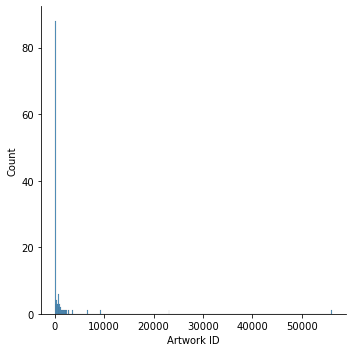

In [21]:
sns.displot(x='Artwork ID', data=aa)       # pabandymui

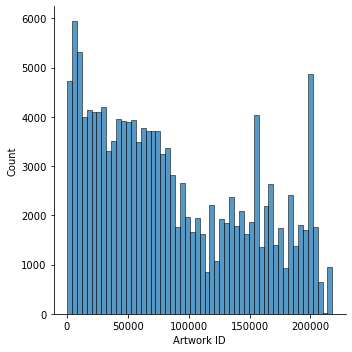

In [116]:
sns.displot(x='Artwork ID', data=artworks.artists)  # pabandymui

In [ ]:
# (darbo metu daug laiko prarasta dėl pasenusios seaborn versijos; čia jos instaliavimo pvz):

In [19]:
sns.__version__

'0.11.0'

In [20]:
pip install seaborn==0.11.0

Note: you may need to restart the kernel to use updated packages.


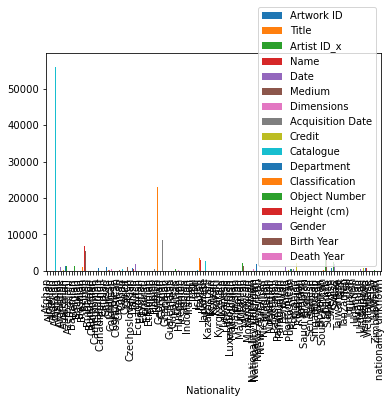

In [24]:
aa.plot.bar()     # pabandymui

In [108]:
artworks.artists.groupby(['Classification']).count()['Artwork ID']

Classification
(not assigned)                     1047
Architecture                       2947
Audio                               988
Collage                               9
Design                            22999
Drawing                           11768
Ephemera                             89
Film                               2292
Film (object)                         3
Frank Lloyd Wright Archive          785
Furniture and Interiors               1
Illustrated Book                  28005
Installation                        596
Media                               361
Mies van der Rohe Archive          3331
Multiple                           1102
Painting                           2273
Performance                          24
Periodical                          768
Photograph                        30057
Photography Research/Reference        4
Print                             31901
Product Design                        1
Sculpture                          1670
Software                 

In [ ]:
# 125 tautybių menininkai reprezentuoja savo menus ir šalį MoMa:

In [78]:
artworks.artists.groupby(['Nationality']).count()['Artwork ID']

Nationality
Afghan                     1
Albanian                  22
Algerian                   7
American               56079
Angolan                    1
                       ...  
Vietnamese                 3
Welsh                      3
Yugoslav                 118
Zimbabwean                14
nationality unknown        2
Name: Artwork ID, Length: 125, dtype: int64

In [ ]:
# Genderiniai menininkų pasiskirstymai:

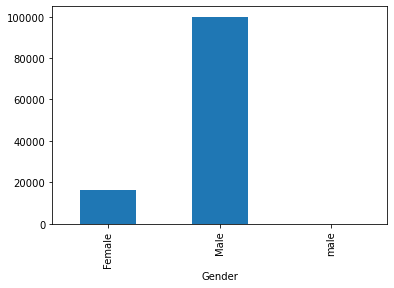

In [39]:
artworks.artists.groupby(['Gender']).count()['Artwork ID'].plot.bar()

In [ ]:
# "FLUXUS" yra įvairių menų judėjimas, pretenduojantis į gyvenimo būdą (kaip meną), 
# todėl klasifikatoriuje ir nėra jo įrašo:

In [62]:
artworks.artists['Classification'].value_counts()

Print                             31901
Photograph                        30057
Illustrated Book                  28005
Design                            22999
Drawing                           11768
Mies van der Rohe Archive          3331
Architecture                       2947
Video                              2366
Film                               2292
Painting                           2273
Sculpture                          1670
Multiple                           1102
(not assigned)                     1047
Audio                               988
Frank Lloyd Wright Archive          785
Periodical                          768
Installation                        596
Work on Paper                       494
Media                               361
Ephemera                             89
Textile                              33
Performance                          24
Collage                               9
Photography Research/Reference        4
Software                              3


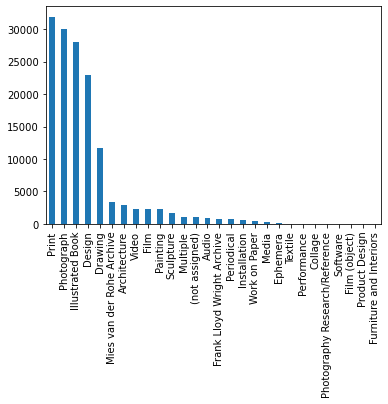

In [63]:
artworks.artists['Classification'].value_counts().plot.bar()

In [ ]:
# Jurgis Mačiūnas, "FLUXUS" judėjimo įkūrėjas savo darbų kiekiu, saugomu MoMa, yra 16 
# (ar 12?) vietoje (762 artefaktai):

In [74]:
artworks.artists.Name.value_counts()[:20]

Unknown Designer            10584
Eugène Atget                 5050
Various Artists              3770
Louise Bourgeois             3318
Unknown Artist               2720
Ludwig Mies van der Rohe     2566
Unknown photographer         1575
Jean Dubuffet                1435
Lee Friedlander              1317
Pablo Picasso                1310
Marc Chagall                 1162
Henri Matisse                1063
Pierre Bonnard                894
Lilly Reich                   823
Frank Lloyd Wright            799
George Maciunas               762
August Sander                 749
Georges Rouault               632
Émile Bernard                 631
Ben Kinmont                   597
Name: Name, dtype: int64

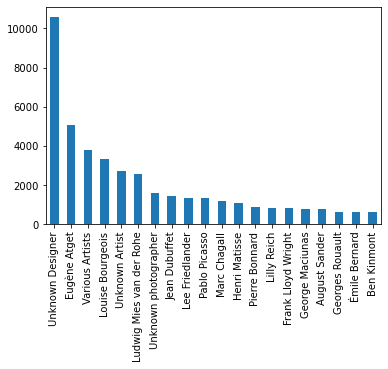

In [75]:
artworks.artists.Name.value_counts()[:20].plot.bar()

In [ ]:
# (darbo metu aptikta dvejopa veikianti sintaksė, su skliausteliais ir be):

In [81]:
artworks.artists.Nationality.value_counts()

American      56832
French        23197
German         9537
British        6797
Italian        3664
              ...  
Sudanese          1
Rwandan           1
Ugandan           1
Macedonian        1
Syrian            1
Name: Nationality, Length: 125, dtype: int64

In [85]:
artworks.artists['Nationality'].value_counts()

American      56832
French        23197
German         9537
British        6797
Italian        3664
              ...  
Sudanese          1
Rwandan           1
Ugandan           1
Macedonian        1
Syrian            1
Name: Nationality, Length: 125, dtype: int64

In [ ]:
# "FLUXUS" kolekcija antra nuo galo pagal dydį:

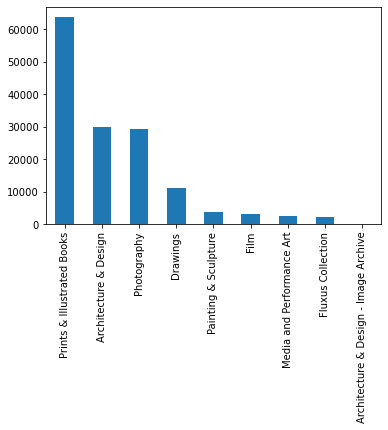

In [92]:
artworks.artists['Department'].value_counts().plot.bar()

In [ ]:
# kada MoMa įsigijo "FLUXUS" artefaktų paskutinįsyk?:

In [104]:
artworks.artists[artworks.artists['Department']=='Fluxus Collection']['Acquisition Date']

16876     2008-10-08
16958     2008-10-08
16959     2008-10-08
16960     2008-10-08
16961     2008-10-08
             ...    
142857    2008-10-08
142858    2008-10-08
145914    2008-10-08
145915    2008-10-08
145916    2008-10-08
Name: Acquisition Date, Length: 2171, dtype: object

In [105]:
artworks.artists[artworks.artists['Department']=='Fluxus Collection']['Acquisition Date'].max()

'2008-10-08'

In [ ]:
# Hipotezė: ar galime teigti (pagal meno kūrinių įsigijimo datą), jog "FLUXUS" 
# meninis judėjimas užsibaigė (išsikvėpė)? 
# ATS.: - Sprendžiant iš to, kad paskutinįsyk MoMa kolekcija pasipildė "FLUXUS" darbais
# 2008-10-08, galime teigti "taip". :) 

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


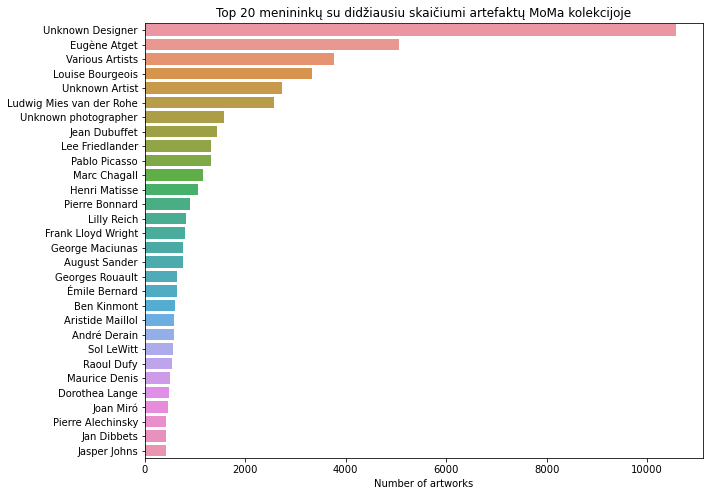

In [111]:
def plot_val_counts(df,column='Name',figsize=(10,8),title=None):
    counts = df[column].value_counts()[:30]
    plt.figure(figsize=figsize)
    sns.barplot(counts.values,counts.index)
#     plt.xlabel(column)
    plt.xlabel('Number of artworks')
    plt.xticks(rotation=0)
    plt.title(title)
    plt.show()

plot_val_counts(artworks.artists,title='Top 20 menininkų su didžiausiu skaičiumi artefaktų MoMa kolekcijoje')